# Evolent Health: Beer Data Analysis
#### The project descriptions, questions and datasets were all downloaded from Strata Scratch. According to Strata Scratch, this data project has been used as a take-home assignment in the recruitment process for the data science positions at Evolent Health. 
#### All of the followings are done solely for the purpose of self-practice. 

### Assignment: 
- Rank the top 3 breweries which produce the strongest beers.
- Which year did beers enjoy the highest ratings?
- Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
- If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
- Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?

### About the dataset(s): 
- Source: https://platform.stratascratch.com/data-projects/beer-data-analysis
- Description: The provided compressed file `EvolentHealth_data_beer.tar.bz2` contains data about beers and their reviews

### Data Dictionary:

**EvolentHealth_data_beer.tar.bz2**

| variable               | description                            |
|:-----------------------|:---------------------------------------|
| beer_ABV               | alcohol by volume                      |
| beer_beerId            | beer ID                                |
| beer_brewerId          | beer brewer ID                         |
| beer_name              | beer name                              |
| beer_style             | beer style                             |
| review_appearance      | review on the beer's appearance        |
| review_palette         | review on the beer's palette (colours) |
| review_overall         | overall beer review                    |
| review_taste           | review on the beer's taste             |
| review_profileName     | profile name of the reviewer           |
| review_aroma           | review on the beer's aroma             |
| review_text            | the full text of the review            |
| review_time            | timestamp when the review was made     |

---
## EDA
---

In [3]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

os.chdir(path="/Users/noel/Desktop/2023_projects/datasets")
df = pd.read_csv("EvolentHealth_data_beer.tar.bz2", compression="bz2")

display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


None

beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.0        47986          10325            Sausa Weizen   
1       6.2        48213          10325                Red Moon   
2       6.5        48215          10325  Black Horse Black Beer   
3       5.0        47969          10325              Sausa Pils   
4       7.7        64883           1075           Cauldron DIPA   

                       beer_style  review_appearance  review_palette  \
0                      Hefeweizen                2.5             2.0   
1              English Strong Ale                3.0             2.5   
2          Foreign / Export Stout                3.0             2.5   
3                 German Pilsener                3.5             3.0   
4  American Double / Imperial IPA                4.0             4.5   

   review_overall  review_taste review_profileName  review_aroma  \
0             1.5           1.5            stcules           1.5   
1             3.0           3.0            stcules           3.0   
2             3.0           3.0            stcules           3.0   
3             3.0           2.5            stcules           3.0   
4             4.0           4.0     johnmichaelsen           4.5   

                                         review_text  review_time  
0  A lot of foam. But a lot. In the smell some ba...   1234817823  
1  Dark red color, light beige foam, average. In ...   1235915097  
2  Almost totally black. Beige foam, quite compac...   1235916604  
3  Golden yellow color. White, compact foam, quit...   1234725145  
4  According to the website, the style for the Ca...   1293735206

beer_ABV    beer_beerId  beer_brewerId  review_appearance  \
count  508590.000000  528870.000000  528870.000000      528870.000000   
mean        7.017442   22098.466016    2598.423429           3.864522   
std         2.204460   22158.284352    5281.805350           0.604010   
min         0.010000       3.000000       1.000000           0.000000   
25%         5.300000    1745.000000     132.000000           3.500000   
50%         6.500000   14368.000000     394.000000           4.000000   
75%         8.500000   40528.000000    1475.000000           4.000000   
max        57.700000   77310.000000   27980.000000           5.000000   

       review_palette  review_overall   review_taste   review_aroma  \
count   528870.000000   528870.000000  528870.000000  528870.000000   
mean         3.758926        3.833197       3.765993       3.817350   
std          0.685335        0.709962       0.669018       0.718903   
min          1.000000        0.000000       1.000000       1.000000   
25%          3.500000        3.500000       3.500000       3.500000   
50%          4.000000        4.000000       4.000000       4.000000   
75%          4.000000        4.500000       4.000000       4.500000   
max          5.000000        5.000000       5.000000       5.000000   

        review_time  
count  5.288700e+05  
mean   1.224885e+09  
std    7.605600e+07  
min    8.843904e+08  
25%    1.174613e+09  
50%    1.240366e+09  
75%    1.288560e+09  
max    1.326277e+09

(528870, 13)


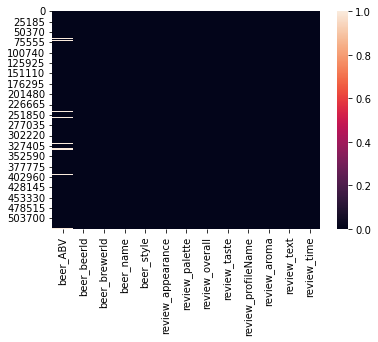

(508358, 13)


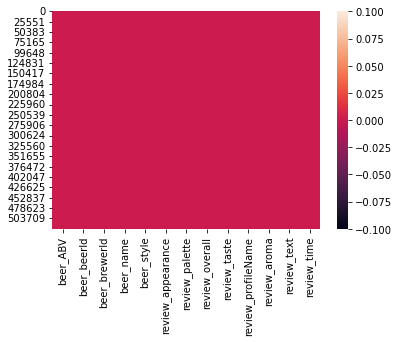

In [4]:
# Remove NAs
print(df.shape)
pre_na = sns.heatmap(df.isna()); plt.show()
df = df.dropna()

print(df.shape)
post_na = sns.heatmap(df.isna()); plt.show()

In [5]:
# Remove duplicates
df_reviews_of_each_profile = pd.DataFrame(df.groupby("review_profileName")[["beer_beerId", "review_time"]].count()).reset_index()
df_reviews_of_each_profile = df_reviews_of_each_profile.sort_values(by="beer_beerId", ascending=False)
display(df_reviews_of_each_profile.head(10))

df = df.drop_duplicates(subset=["review_profileName", "beer_beerId"], keep="first").reset_index(drop=True)
print(df.shape)
df.head()

review_profileName  beer_beerId  review_time
18245     northyorksammy         1732         1732
17419        mikesgroove         1320         1320
1646       BuckeyeNation         1212         1212
6620            Phyl21ca         1152         1152
22236      womencantsail         1113         1113
1916        ChainGangGuy         1045         1045
8452           Thorpe429          980          980
10905           brentk56          972          972
13513      feloniousmonk          919          919
6109         NeroFiddled          907          907

(503700, 13)


beer_ABV  beer_beerId  beer_brewerId               beer_name  \
0       5.0        47986          10325            Sausa Weizen   
1       6.2        48213          10325                Red Moon   
2       6.5        48215          10325  Black Horse Black Beer   
3       5.0        47969          10325              Sausa Pils   
4       7.7        64883           1075           Cauldron DIPA   

                       beer_style  review_appearance  review_palette  \
0                      Hefeweizen                2.5             2.0   
1              English Strong Ale                3.0             2.5   
2          Foreign / Export Stout                3.0             2.5   
3                 German Pilsener                3.5             3.0   
4  American Double / Imperial IPA                4.0             4.5   

   review_overall  review_taste review_profileName  review_aroma  \
0             1.5           1.5            stcules           1.5   
1             3.0           3.0            stcules           3.0   
2             3.0           3.0            stcules           3.0   
3             3.0           2.5            stcules           3.0   
4             4.0           4.0     johnmichaelsen           4.5   

                                         review_text  review_time  
0  A lot of foam. But a lot. In the smell some ba...   1234817823  
1  Dark red color, light beige foam, average. In ...   1235915097  
2  Almost totally black. Beige foam, quite compac...   1235916604  
3  Golden yellow color. White, compact foam, quit...   1234725145  
4  According to the website, the style for the Ca...   1293735206

---
## Q1: Rank the top 3 breweries which produce the strongest beers.
`Apprach: compare the mean/median of overall review by brewer`
- Check skewness of beer_ABV before deciding whether to use mean/median
- Group the data by beer_brewerID and calculate the mean/median
- Rank by mean/median
---

SkewtestResult(statistic=318.3167088772542, pvalue=0.0)


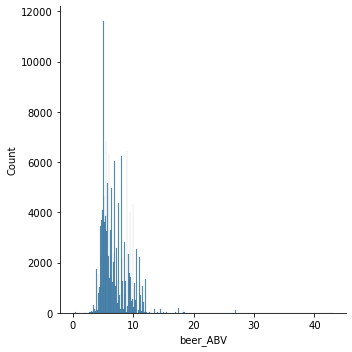

In [6]:
from scipy.stats import skewtest
print(skewtest(df.beer_ABV, nan_policy="omit"))

q1_sample_skewtest = df.sample(frac=0.3, random_state=2023)
sns.displot(data=q1_sample_skewtest, x="beer_ABV")

In [7]:
ans_q1_df = df.groupby("beer_brewerId").agg(median_ABV=("beer_ABV", "median")).reset_index()
ans_q1_df = ans_q1_df.sort_values(by="median_ABV")

ans_q1_df["RANK_by_median"] = ans_q1_df["median_ABV"].rank(method="min", ascending=False)
ans_q1_df = ans_q1_df.sort_values(by="RANK_by_median", ascending=True)

ans_q1_df = ans_q1_df[ans_q1_df["RANK_by_median"]<=3]
ans_q1_df["beer_brewerId"] = ans_q1_df["beer_brewerId"].astype(str)
ans_q1_df["RANK_by_median"] = ans_q1_df["RANK_by_median"].astype("category")

display(ans_q1_df)

ans_q1_plot = px.bar(ans_q1_df, x="beer_brewerId", y="median_ABV", text="RANK_by_median", color="RANK_by_median", template="simple_white")
ans_q1_plot.update_xaxes(tickmode="linear")
ans_q1_plot.update_layout(
    xaxis_title = "Beer brewer id", yaxis_title = "Beer ABV (median)",
    title="<b>Question 1: Rank the top 3 breweries which produce the strongest beers<br>ANS: 736, 5662, 36/6513")

ans_q1_plot.show()

beer_brewerId  median_ABV RANK_by_median
165           736        14.0            1.0
636          5562        13.2            2.0
8              36        13.0            3.0
699          6513        13.0            3.0

---
## Q2: Which year did beers enjoy the highest ratings?
`Aapprach: compare the mean/median of overall review by year`

- Convert the review time to standard datetime format: review_time_converted
- Extract the review year from the converted time: review_yr
- Check skewness of review_overall before deciding whether to use mean/median
- Group the data by review_yr and calculate the mean/median
---

SkewtestResult(statistic=-250.20887110577434, pvalue=0.0)


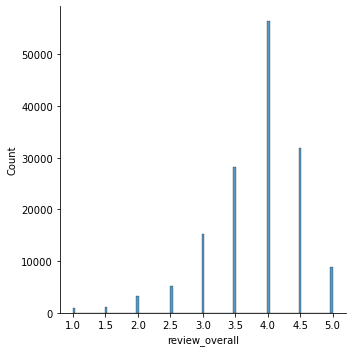

In [8]:
from scipy.stats import skewtest
print(skewtest(df.review_overall, nan_policy="omit"))

q2_ssample_skewtest = df.sample(frac=0.3, random_state=2023)
sns.displot(data=q2_ssample_skewtest, x="review_overall")

In [9]:
df["review_time_converted"] = pd.to_datetime(df["review_time"], unit="s")
df["review_yr"] = df["review_time_converted"] .dt.year

ans_q2_df = df.groupby("review_yr").agg(mean_review_overall=("review_overall", "mean")).reset_index()
ans_q2_df = ans_q2_df.sort_values(by="mean_review_overall", ascending=False).reset_index(drop=True)
ans_q2_df["review_yr"] = ans_q2_df["review_yr"].astype(str)

ans_q2_df["RANK_by_mean"] = ans_q2_df["mean_review_overall"].rank(method="min", ascending=False)
ans_q2_df["review_yr"] = ans_q2_df["review_yr"].astype(str)
ans_q2_df["RANK_by_mean"] = ans_q2_df["RANK_by_mean"].astype("category")

display(ans_q2_df)

ans_q2_plot = px.bar(ans_q2_df, x="review_yr", y="mean_review_overall", text="RANK_by_mean", color="RANK_by_mean", template="simple_white")
ans_q2_plot.update_xaxes(tickmode="linear")
ans_q2_plot.update_layout(
    xaxis_title = "Review year", yaxis_title = "Overall review (mean)",
    title = "<b>Q2: Which year did beers enjoy the highest ratings?<br>ANS: 2000")

ans_q2_plot.show()

review_yr  mean_review_overall RANK_by_mean
0       2000             4.241379          1.0
1       1998             4.045455          2.0
2       1999             4.000000          3.0
3       2001             3.959357          4.0
4       2010             3.867784          5.0
5       2009             3.866853          6.0
6       2005             3.843692          7.0
7       2008             3.838512          8.0
8       2012             3.838173          9.0
9       2011             3.832429         10.0
10      2007             3.817254         11.0
11      2002             3.817035         12.0
12      2006             3.807381         13.0
13      2004             3.803884         14.0
14      2003             3.771235         15.0

---
## Q3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

`Aapprach: compare the correlation coefficients (between each factor and overall review)`
- Convert the review time to standard datetime format: review_time_converted
- Extract the review year from the converted time: review_yr
- Check skewness of review_overall before deciding whether to use mean/median
- Group the data by review_yr and calculate the mean/median
---

In [10]:
factors = ["review_taste", "review_aroma", "review_appearance", "review_palette", "review_overall"]
ans_q3_df = df.groupby("beer_name")[factors].mean().reset_index()
ans_q3_df = ans_q3_df.corr()

display(ans_q3_df)

import plotly.figure_factory as ff
ans_q3_plot = ff.create_annotated_heatmap(
    z=ans_q3_df.to_numpy().round(2),
    x=list(ans_q3_df.index.values),
    y=list(ans_q3_df.columns.values),       
    colorscale='Viridis'
)

ans_q3_plot.update_layout(
    template = "simple_white",
    title = "<b>Q3: Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?<br>ANS: Aroma overall"
)

ans_q3_plot.update_xaxes(side="bottom")

ans_q3_plot.show()

review_taste  review_aroma  review_appearance  \
review_taste           1.000000      0.838897           0.690494   
review_aroma           0.838897      1.000000           0.669010   
review_appearance      0.690494      0.669010           1.000000   
review_palette         0.762278      0.831128           0.678296   
review_overall         0.826525      0.886040           0.646393   

                   review_palette  review_overall  
review_taste             0.762278        0.826525  
review_aroma             0.831128        0.886040  
review_appearance        0.678296        0.646393  
review_palette           1.000000        0.772378  
review_overall           0.772378        1.000000

---
## Q4: If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
`Aapprach: find the ones with highest overall reviews, and meanwhile being reviewed most often `
- group by overall reviews: review_overall
- find the beer with highest scores, and meanwhile mostly reviewed
---

beer_beerId  mean_overall_review  count_overall_review
count  14990.000000         14990.000000          14990.000000
mean   40740.290527             3.650533             33.602402
std    22634.524770             0.625193            140.888114
min        5.000000             1.000000              1.000000
25%    20957.250000             3.400000              1.000000
50%    42341.500000             3.750000              3.000000
75%    60703.250000             4.000000             10.000000
max    77310.000000             5.000000           2928.000000

array([[<AxesSubplot:title={'center':'count_overall_review'}>]],
      dtype=object)

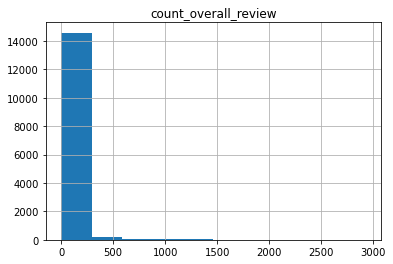

In [108]:
ans_q4_df = df.groupby("beer_beerId")["review_overall"].agg(["mean", "count"]).reset_index()
ans_q4_df = ans_q4_df.sort_values(by=["count", "mean"], ascending=False)
ans_q4_df.columns = ["beer_beerId", "mean_overall_review", "count_overall_review"]

display(ans_q4_df.describe())
ans_q4_df.hist(column="count_overall_review")

beer_beerId  mean_overall_review  count_overall_review
374          1904             4.166496                  2928
63            276             4.247525                  2525
13             34             4.297335                  2477
2086        11757             4.355915                  2443
516          2671             3.966844                  2443

array([[<AxesSubplot:title={'center':'count_overall_review'}>]],
      dtype=object)

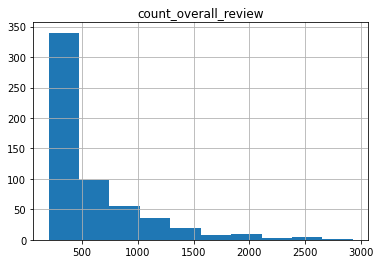

In [109]:
ans_q4_df = ans_q4_df[ans_q4_df["count_overall_review"] > 200]
ans_q4_df = ans_q4_df.sort_values(by=["count_overall_review", "mean_overall_review"], ascending=False)

display(ans_q4_df.head(5))
ans_q4_df.hist(column="count_overall_review")

In [110]:
ans_q4_df = df[(df["beer_beerId"] == 1904) | (df["beer_beerId"] == 276) | (df["beer_beerId"] == 34) | 
               (df["beer_beerId"] == 11757) | (df["beer_beerId"] == 2671) ]

ans_q4_df = ans_q4_df.drop_duplicates(subset="beer_beerId")
ans_q4_df = ans_q4_df.sort_values(by="review_overall", ascending=False)

ans_q4_df

beer_ABV  beer_beerId  beer_brewerId  \
85950        5.6          276            140   
73383        9.6         2671            140   
79850        6.8         1904            140   
354491       9.0           34             22   
19807        8.3        11757           1199   

                                         beer_name  \
85950                       Sierra Nevada Pale Ale   
73383   Sierra Nevada Bigfoot Barleywine Style Ale   
79850                Sierra Nevada Celebration Ale   
354491                             La Fin Du Monde   
19807                     Founders Breakfast Stout   

                              beer_style  review_appearance  review_palette  \
85950            American Pale Ale (APA)                3.5             4.0   
73383                American Barleywine                4.0             3.5   
79850                       American IPA                4.0             4.0   
354491                            Tripel                4.0             4.0   
19807   American Double / Imperial Stout                3.5             4.0   

        review_overall  review_taste review_profileName  review_aroma  \
85950              4.5           4.0        wheatyweiss           4.0   
73383              4.0           4.0       WeymouthMike           4.0   
79850              4.0           4.0              Jayli           4.5   
354491             4.0           4.0       Birdiebeagle           4.0   
19807              3.5           3.5             haddon           4.0   

                                              review_text  review_time  \
85950   Been drinking this for years when I realized I...   1238884831   
73383   Sample is from a 2006 bottle. Apearance is a c...   1237593581   
79850   Consumed 12/1 A: This beer pours a nice clear ...   1260654677   
354491  Bottle Pours a golden orange with a fluffy whi...   1239107288   
19807   pours very thick and dark, almost black. littl...   1276651429   

       review_time_converted  review_yr  
85950    2009-04-04 22:40:31       2009  
73383    2009-03-20 23:59:41       2009  
79850    2009-12-12 21:51:17       2009  
354491   2009-04-07 12:28:08       2009  
19807    2010-06-16 01:23:49       2010

In [122]:
ans_q4_plot = px.bar(ans_q4_df, x="beer_name", y="review_overall", text="review_overall", template="simple_white")
ans_q4_plot.update_xaxes(tickmode="linear", tickangle= -15)
ans_q4_plot.update_layout(
    xaxis_title = "Beer name", yaxis_title = "Review socre (overall)",
    title = "<b>Q4: If you were to recommend 3 beers to your friends based on this data, <br>which ones would you recommend?<b>"
)

ans_q4_plot.show()

---
## Q5: Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for that beer style?
`Aapprach: XXX `
- XXX
- XXX
---